In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.tree import export_text
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from graphviz import Source
import pydotplus
from io import StringIO

In [2]:
medal_by_country = pd.read_csv('data/medal_by_country_coor.csv')
medal_by_country

,country,gold,silver,bronze,total,longitude,latitude,class
0,FR Germany,289,218,198,1501,10.451526,51.165691,1
1,Sweden,190,205,143,1123,18.643501,60.128161,1
2,Belgium,79,73,70,453,4.469936,50.503887,1
3,Great Britain,439,502,483,2804,-3.435973,55.378051,1
4,Netherlands,189,239,237,1282,5.291266,52.132633,1
...,...,...,...,...,...,...,...,...
110,Syria,0,0,1,1,38.996815,34.802075,4
111,Kazakhstan,1,1,0,5,66.923684,48.019573,4
112,Faroe Islands,1,7,5,22,-6.911806,61.892635,4
113,Peru,2,1,2,10,-75.015152,-9.189967,4


In [3]:
y_gold = []
y_silver = []
y_bronze = []
for gold,silver,bronze in zip(medal_by_country["gold"],medal_by_country["silver"],medal_by_country["bronze"]):
    if gold > 0:
        y_gold.append(1)
    else:
        y_gold.append(0)
    if silver > 0:
        y_silver.append(1)
    else:
        y_silver.append(0)
    if bronze > 0:
        y_bronze.append(1)
    else:
        y_bronze.append(0)

In [4]:
data_changed = pd.DataFrame()
data_changed["class"] = medal_by_country["class"]
data_changed["gold"] = medal_by_country["gold"]
data_changed["silver"] = medal_by_country["silver"]
data_changed["bronze"] = medal_by_country["bronze"]
data_changed

,class,gold,silver,bronze
0,1,289,218,198
1,1,190,205,143
2,1,79,73,70
3,1,439,502,483
4,1,189,239,237
...,...,...,...,...
110,4,0,0,1
111,4,1,1,0
112,4,1,7,5
113,4,2,1,2


In [5]:
data_changed = data_changed.astype({"class": str}, errors='raise') 
data_changed

,class,gold,silver,bronze
0,1,289,218,198
1,1,190,205,143
2,1,79,73,70
3,1,439,502,483
4,1,189,239,237
...,...,...,...,...
110,4,0,0,1
111,4,1,1,0
112,4,1,7,5
113,4,2,1,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

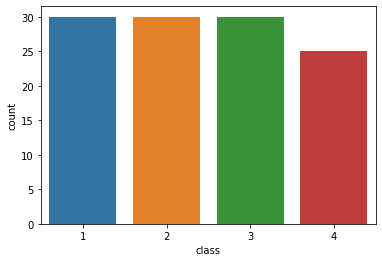

In [6]:
sns.countplot(data_changed['class'])

In [7]:
#sns.countplot(data_changed['gold'],hue=data_changed['class'])

In [8]:
#sns.countplot(data_changed['silver'],hue=data_changed['class'])

In [9]:
X = data_changed.drop('class',axis=1)
y = data_changed[['class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=83)

In [10]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=83,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=83)

In [11]:
y_predict = clf_model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7428571428571429

In [12]:
target = list(data_changed['class'].unique())
feature_names = list(X.columns)

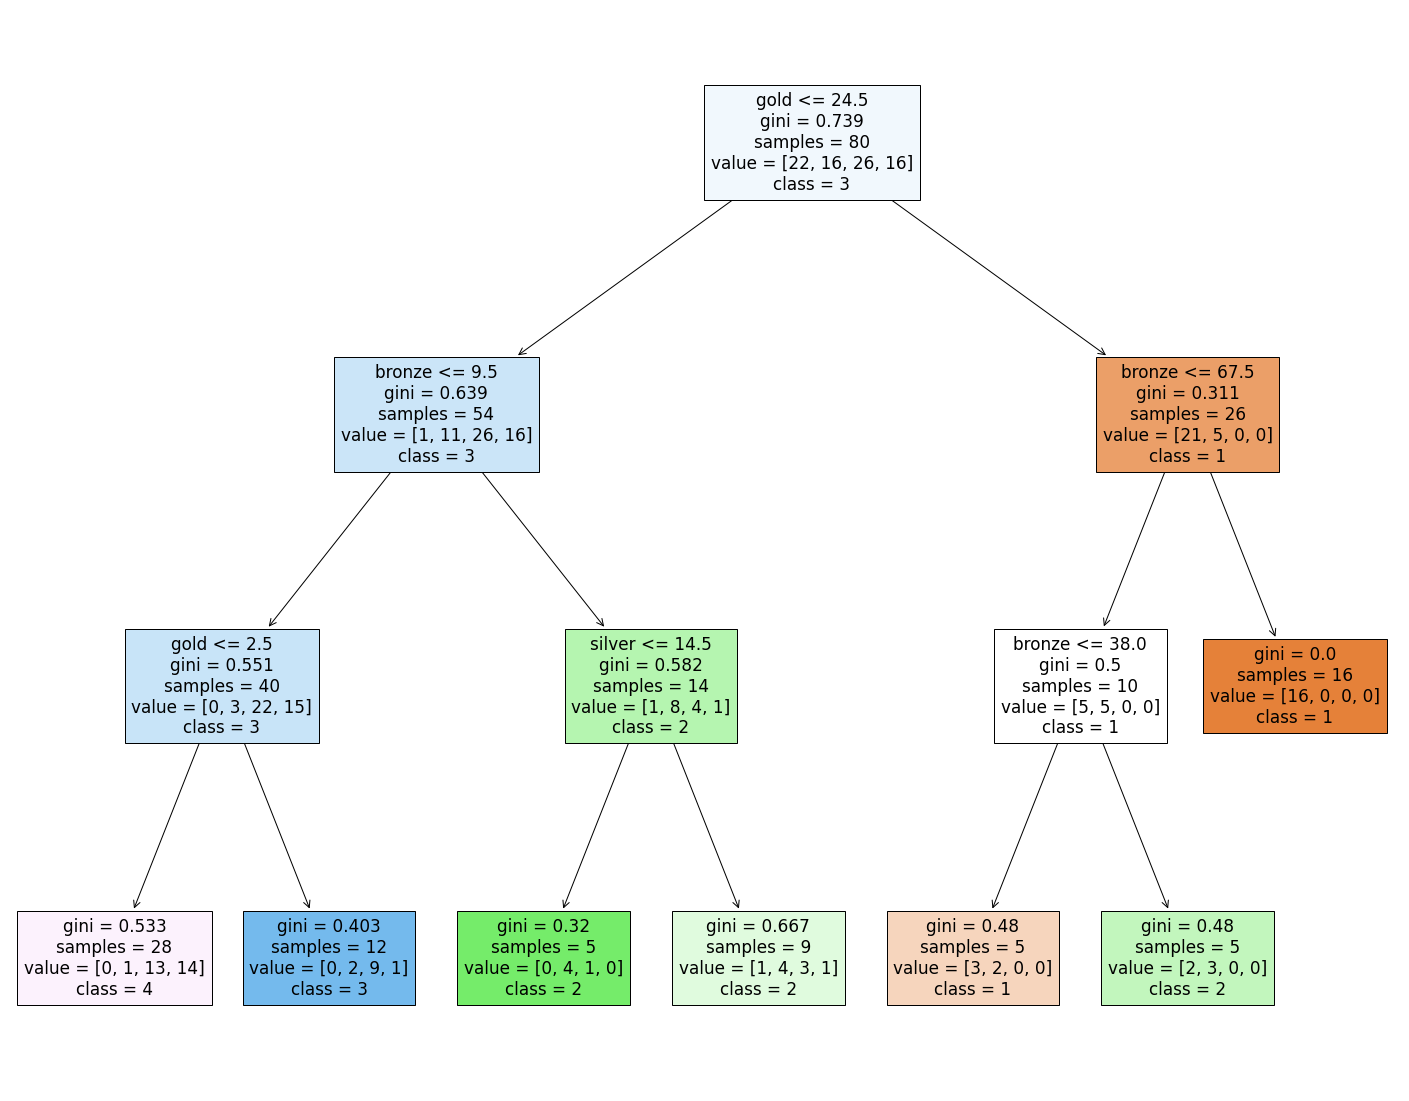

In [13]:
dot_data = tree.export_graphviz(clf_model, out_file=None, feature_names=feature_names,  class_names=target,  filled=True, rounded=True,  special_characters=True)  
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_model, 
                   feature_names=feature_names,  
                   class_names=target,
                   filled=True)
#graph = graphviz.Source(dot_data)  
#graph.write_png("images/decision_tree_medal_by_class_with_total.png")  
#graph
fig.savefig("images/decision_tree_medal_by_class_without_total.png")

In [14]:
r = export_text(clf_model, feature_names=feature_names)
r

'|--- gold <= 24.50\n|   |--- bronze <= 9.50\n|   |   |--- gold <= 2.50\n|   |   |   |--- class: 4\n|   |   |--- gold >  2.50\n|   |   |   |--- class: 3\n|   |--- bronze >  9.50\n|   |   |--- silver <= 14.50\n|   |   |   |--- class: 2\n|   |   |--- silver >  14.50\n|   |   |   |--- class: 2\n|--- gold >  24.50\n|   |--- bronze <= 67.50\n|   |   |--- bronze <= 38.00\n|   |   |   |--- class: 1\n|   |   |--- bronze >  38.00\n|   |   |   |--- class: 2\n|   |--- bronze >  67.50\n|   |   |--- class: 1\n'

In [15]:
data_changed_1 = pd.DataFrame()
data_changed_1["class"] = medal_by_country["class"]
data_changed_1["gold"] = y_gold
data_changed_1["silver"] = y_silver
data_changed_1["bronze"] = y_bronze
data_changed_1 = data_changed_1.astype({"class": str}, errors='raise') 
data_changed_1

,class,gold,silver,bronze
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
110,4,0,0,1
111,4,1,1,0
112,4,1,1,1
113,4,1,1,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gold', ylabel='count'>

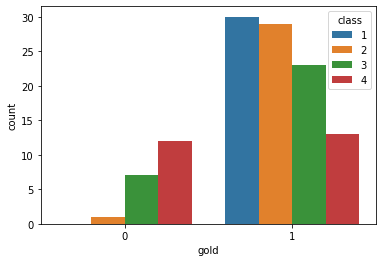

In [16]:
sns.countplot(data_changed_1['gold'],hue=data_changed_1['class'])

In [17]:
X = data_changed_1.drop('class',axis=1)
y = data_changed_1[['class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=60)

In [18]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=60,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=60)

In [19]:
y_predict = clf_model.predict(X_test)
accuracy_score(y_test,y_predict)

0.2857142857142857

In [20]:
target = list(data_changed_1['class'].unique())
feature_names = list(X.columns)

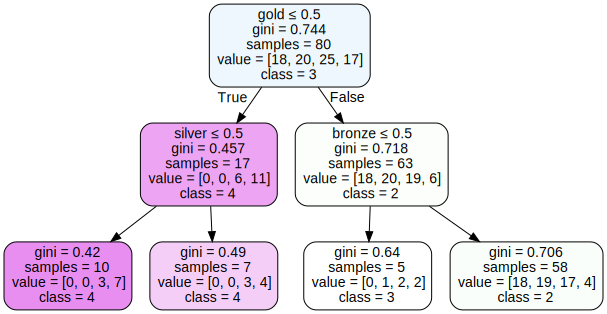

In [21]:
dot_data = tree.export_graphviz(clf_model, out_file=None, feature_names=feature_names,  class_names=target,  filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [22]:
data_changed_2 = pd.DataFrame()
data_changed_2["class"] = medal_by_country["class"]
data_changed_2["gold"] = y_gold
data_changed_2["silver"] = y_silver
data_changed_2["bronze"] = y_bronze
data_changed_2["total"] = medal_by_country["total"]
data_changed_2 = data_changed_2.astype({"class": str}, errors='raise') 
data_changed_2

,class,gold,silver,bronze,total
0,1,1,1,1,1501
1,1,1,1,1,1123
2,1,1,1,1,453
3,1,1,1,1,2804
4,1,1,1,1,1282
...,...,...,...,...,...
110,4,0,0,1,1
111,4,1,1,0,5
112,4,1,1,1,22
113,4,1,1,1,10


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gold', ylabel='count'>

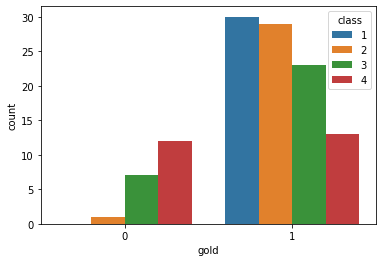

In [23]:
sns.countplot(data_changed_2['gold'],hue=data_changed_2['class'])

In [24]:
X = data_changed_2.drop('class',axis=1)
y = data_changed_2[['class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=60)

In [25]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=60,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=60)

In [26]:
y_predict = clf_model.predict(X_test)
accuracy_score(y_test,y_predict)

0.6571428571428571

In [27]:
target = list(data_changed_2['class'].unique())
feature_names = list(X.columns)

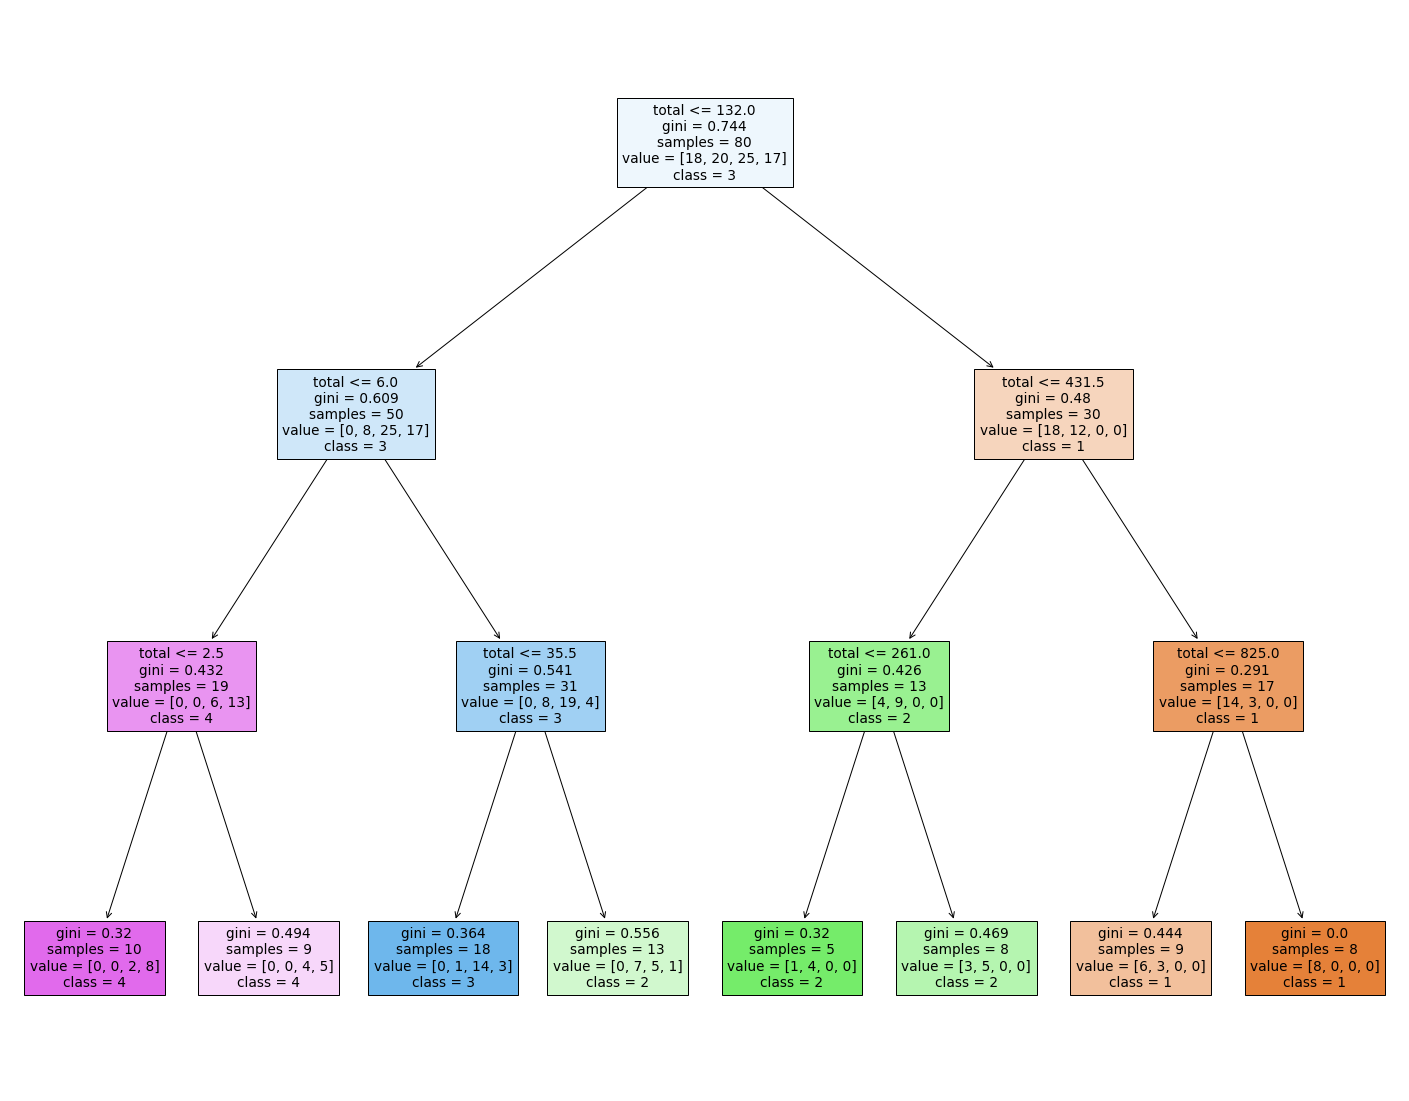

In [28]:
dot_data = tree.export_graphviz(clf_model, out_file=None, feature_names=feature_names,  class_names=target,  filled=True, rounded=True,  special_characters=True)  
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_model, 
                   feature_names=feature_names,  
                   class_names=target,
                   filled=True)
fig.savefig("images/decision_tree_medal_by_class_with_total.png")

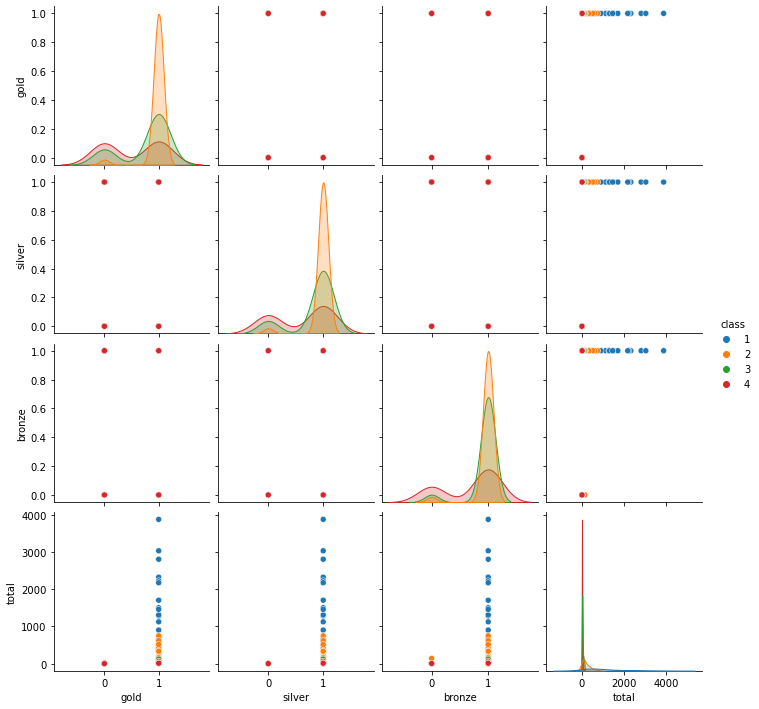

In [29]:
sns_plot = sns.pairplot(data=data_changed_2, hue='class')
plt.show()
sns_plot.savefig("images/pairplot_medal_by_class.png")

In [30]:
for i in range(100):
    print(i)
    data_changed_2 = pd.DataFrame()
    data_changed_2["class"] = medal_by_country["class"]
    data_changed_2["gold"] = y_gold
    data_changed_2["silver"] = y_silver
    data_changed_2["bronze"] = y_bronze
    data_changed_2["total"] = medal_by_country["total"]
    data_changed_2 = data_changed_2.astype({"class": str}, errors='raise') 
    X = data_changed_2.drop('class',axis=1)
    y = data_changed_2[['class']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=i)
    clf_model = DecisionTreeClassifier(criterion="gini", random_state=i,max_depth=3, min_samples_leaf=5)   
    clf_model.fit(X_train,y_train)
    y_predict = clf_model.predict(X_test)
    print(accuracy_score(y_test,y_predict))

0
0.5142857142857142
1
0.4857142857142857
2
0.6285714285714286
3
0.7428571428571429
4
0.6
5
0.6571428571428571
6
0.5714285714285714
7
0.6
8
0.5714285714285714
9
0.6285714285714286
10
0.5714285714285714
11
0.6285714285714286
12
0.6571428571428571
13
0.6
14
0.7142857142857143
15
0.5714285714285714
16
0.5714285714285714
17
0.5714285714285714
18
0.5714285714285714
19
0.5142857142857142
20
0.42857142857142855
21
0.6571428571428571
22
0.4857142857142857
23
0.5142857142857142
24
0.5428571428571428
25
0.5714285714285714
26
0.42857142857142855
27
0.6
28
0.6
29
0.6
30
0.6
31
0.6571428571428571
32
0.4
33
0.5142857142857142
34
0.6857142857142857
35
0.6
36
0.6285714285714286
37
0.5714285714285714
38
0.6571428571428571
39
0.5428571428571428
40
0.6
41
0.5714285714285714
42
0.6285714285714286
43
0.6571428571428571
44
0.5714285714285714
45
0.6
46
0.6857142857142857
47
0.6285714285714286
48
0.6285714285714286
49
0.5142857142857142
50
0.6571428571428571
51
0.6
52
0.5142857142857142
53
0.5714285714285714


In [31]:
for i in range(100):
    print(i)
    data_changed = pd.DataFrame()
    data_changed["class"] = medal_by_country["class"]
    data_changed["gold"] = medal_by_country["gold"]
    data_changed["silver"] = medal_by_country["silver"]
    data_changed["bronze"] = medal_by_country["bronze"]
    data_changed = data_changed.astype({"class": str}, errors='raise') 
    X = data_changed.drop('class',axis=1)
    y = data_changed[['class']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=i)
    clf_model = DecisionTreeClassifier(criterion="gini", random_state=i,max_depth=3, min_samples_leaf=5)   
    clf_model.fit(X_train,y_train)
    y_predict = clf_model.predict(X_test)
    print(accuracy_score(y_test,y_predict))

0
0.6
1
0.4
2
0.5428571428571428
3
0.5714285714285714
4
0.5142857142857142
5
0.5714285714285714
6
0.45714285714285713
7
0.7142857142857143
8
0.6
9
0.5428571428571428
10
0.4857142857142857
11
0.6285714285714286
12
0.5428571428571428
13
0.5142857142857142
14
0.5142857142857142
15
0.6857142857142857
16
0.5714285714285714
17
0.5428571428571428
18
0.6
19
0.5142857142857142
20
0.42857142857142855
21
0.6571428571428571
22
0.4
23
0.45714285714285713
24
0.5714285714285714
25
0.5428571428571428
26
0.5142857142857142
27
0.5428571428571428
28
0.5142857142857142
29
0.5428571428571428
30
0.4857142857142857
31
0.5714285714285714
32
0.2857142857142857
33
0.6
34
0.6
35
0.5428571428571428
36
0.5428571428571428
37
0.5714285714285714
38
0.5428571428571428
39
0.6285714285714286
40
0.4857142857142857
41
0.4857142857142857
42
0.5428571428571428
43
0.6285714285714286
44
0.5142857142857142
45
0.6285714285714286
46
0.5714285714285714
47
0.6857142857142857
48
0.5142857142857142
49
0.6
50
0.5714285714285714
51
0.